<a href="https://colab.research.google.com/github/mneochengrustno/Works/blob/AI/Lab6_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Сеть Хемминга для распознавания индекса

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

zero = np.array([
                [1, 1, 1, 1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, 1, 1, 1, 1]])

one = np.array([
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, 1, 1],
                [-1, -1, 1, -1, 1],
                [-1, 1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, -1, 1]])

two = np.array([
                [1, 1, 1, 1, 1],
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, 1, -1],
                [-1, -1, 1, -1, -1],
                [-1, 1, -1, -1, -1],
                [1, 1, 1, 1, 1]])

three = np.array([[1, 1, 1, 1, 1],
               [-1, -1, -1, 1, -1],
               [-1, -1, 1, -1, -1],
               [-1, 1, -1, -1, -1],
               [1, 1, 1, 1, 1],
               [-1, -1, -1, 1, -1],
               [-1, -1, 1, -1, -1],
               [-1, 1, -1, -1, -1],
               [1, -1, -1, -1, -1]])

four = np.array([
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, 1, 1, 1, 1],
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, -1, 1]])

five = np.array([
                [1, 1, 1, 1, 1],
                [1, -1, -1, -1, -1],
                [1, -1, -1, -1, -1],
                [1, -1, -1, -1, -1],
                [1, 1, 1, 1, 1],
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, -1, 1],
                [1, 1, 1, 1, 1]])

six = np.array([
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, 1, -1],
                [-1, -1, 1, -1, -1],
                [-1, 1, -1, -1, -1],
                [1, 1, 1, 1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, 1, 1, 1, 1]])

seven = np.array([
                [1, 1, 1, 1, 1],
                [-1, -1, -1, 1, -1],
                [-1, -1, 1, -1, -1],
                [-1, 1, -1, -1, -1],
                [1, -1, -1, -1, -1],
                [1, -1, -1, -1, -1],
                [1, -1, -1, -1, -1],
                [1, -1, -1, -1, -1],
                [1, -1, -1, -1, -1]])

eight = np.array([
                [1, 1, 1, 1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, 1, 1, 1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, 1, 1, 1, 1]])

nine = np.array([
                [1, 1, 1, 1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, 1, 1, 1, 1],
                [-1, -1, -1, 1, -1],
                [-1, -1, 1, -1, -1],
                [-1, 1, -1, -1, -1],
                [1, -1, -1, -1, -1]])

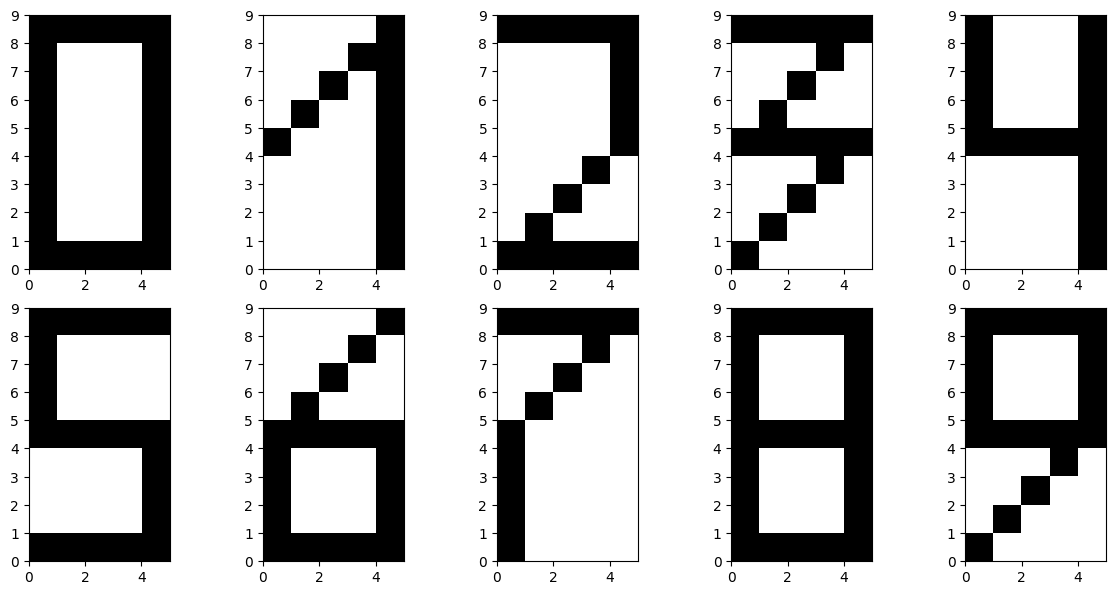

In [ ]:
plt.figure(figsize=(12, 6))
for i, vec in enumerate([zero, one, two, three, four, five, six, seven, eight, nine], 1):
    plt.subplot(2, 5, i)
    plt.imshow(vec, cmap='gray_r', extent=[0, vec.shape[1], 0, vec.shape[0]])
plt.tight_layout()
plt.show()

In [ ]:
numbers = np.array([zero, one, two, three, four, five, six, seven, eight, nine])
x = np.array([np.ravel(num) for num in numbers])

### Создание и обучение сети Хэмминга

In [ ]:
w = x / 2
k, m = x.shape
T = m / 2
E = np.full((k, k), -1/k)
np.fill_diagonal(E, 1)
dif = 0.1

In [ ]:
def f(x): #активационная функция для сети Хэмминга
    if x < 0:
        return 0
    elif x >= T:
        return T
    else:
        return x

F = np.vectorize(f)

### Тестирование

In [ ]:
zero_noisy = np.array([
                [1, 1, -1, 1, -1],
                [1, 1, -1, -1, 1],
                [1, 1, -1, 1, 1],
                [1, -1, -1, -1, 1],
                [1, 1, 1, -1, -1],
                [1, -1, 1, -1, 1],
                [1, 1, 1, -1, 1],
                [1, 1, 1, -1, -1],
                [-1, 1, 1, 1, 1]])

one_noisy = np.array([
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, -1, 1],
                [-1, -1,  1, -1, 1],
                [-1,  -1, -1, -1, 1],
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, -1, -1],
                [1, 1, -1, -1, 1],
                [1, 1, -1, -1, -1],
                [-1, 1, -1, -1, -1]])

two_noisy = np.array([
                [1, 1, 1, 1, 1],
                [-1, -1, 1, 1, 1],
                [-1, -1, -1, 1, 1],
                [-1, 1, -1, 1, 1],
                [-1, -1, -1, -1, 1],
                [-1, 1, -1, 1, -1],
                [-1, -1, 1, -1, -1],
                [-1, -1, 1, -1, -1],
                [-1, -1, 1, 1, 1]])

three_noisy = np.array([
                [1, -1, 1, 1, 1],
                [-1, -1, -1, 1, -1],
                [-1, -1, -1, -1, -1],
                [1, 1, -1, -1, -1],
                [-1, -1, -1, 1, 1],
                [-1, -1, -1, 1, 1],
                [-1, -1, 1, -1, 1],
                [1, 1, -1, -1, -1],
                [-1, -1, -1, -1, -1]])

four_noisy = np.array([
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, -1],
                [1, 1, -1, -1, 1],
                [-1, -1, -1, 1, 1],
                [-1, 1, -1, -1, 1],
                [-1, 1, -1, -1, 1],
                [-1, -1, 1, 1, 1],
                [-1, -1, -1, 1, 1]])

five_noisy = np.array([
                [-1, 1, 1, 1, 1],
                [-1, -1, -1, -1, 1],
                [-1, -1, -1, -1, 1],
                [1, -1, -1, -1, -1],
                [1, -1, -1, 1, -1],
                [-1, -1, -1, -1, -1],
                [-1, -1, -1, -1, 1],
                [-1, -1, 1, 1, 1],
                [1, 1, 1, 1, 1]])

six_noisy = np.array([
                [1, -1, -1, -1, 1],
                [-1, -1, 1, 1, -1],
                [-1, -1, 1, 1, -1],
                [-1, 1, 1, -1, -1],
                [1, -1, -1, 1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, -1, -1, -1, 1],
                [1, 1, 1, -1, -1]])

seven_noisy = np.array([
                [1, -1, -1, 1, 1],
                [-1, 1, -1, 1, -1],
                [-1, 1, 1, -1, -1],
                [-1, 1, -1, -1, -1],
                [1, -1, -1, -1, -1],
                [1, -1, -1, -1, -1],
                [-1, 1, -1, -1, -1],
                [-1, -1, -1, -1, -1],
                [-1, -1, -1, -1, -1]])

eight_noisy = np.array([
                [-1, 1, 1, 1, -1],
                [1, -1, 1, -1, 1],
                [-1, -1, 1, -1, 1],
                [-1, -1, -1, -1, 1],
                [-1, 1, -1, 1, 1],
                [-1, 1, 1, -1, 1],
                [-1, -1, 1, -1, 1],
                [1, -1, -1, -1, 1],
                [-1, 1, 1, 1, -1]])

nine_noisy = np.array([
                [-1, -1, 1, 1, 1],
                [-1, 1, 1, -1, 1],
                [1, -1, 1, -1, 1],
                [-1, -1, -1, -1, 1],
                [1, 1, 1, 1, 1],
                [-1, -1, -1, -1, -1],
                [-1, -1, 1, 1, -1],
                [-1, 1, 1, 1, -1],
                [1, -1, -1, -1, 1]])

In [ ]:
noisy_numbers = [zero_noisy, one_noisy, two_noisy, three_noisy, four_noisy,
                five_noisy, six_noisy, seven_noisy, eight_noisy, nine_noisy]
noisy = np.array([np.ravel(t) for t in noisy_numbers])

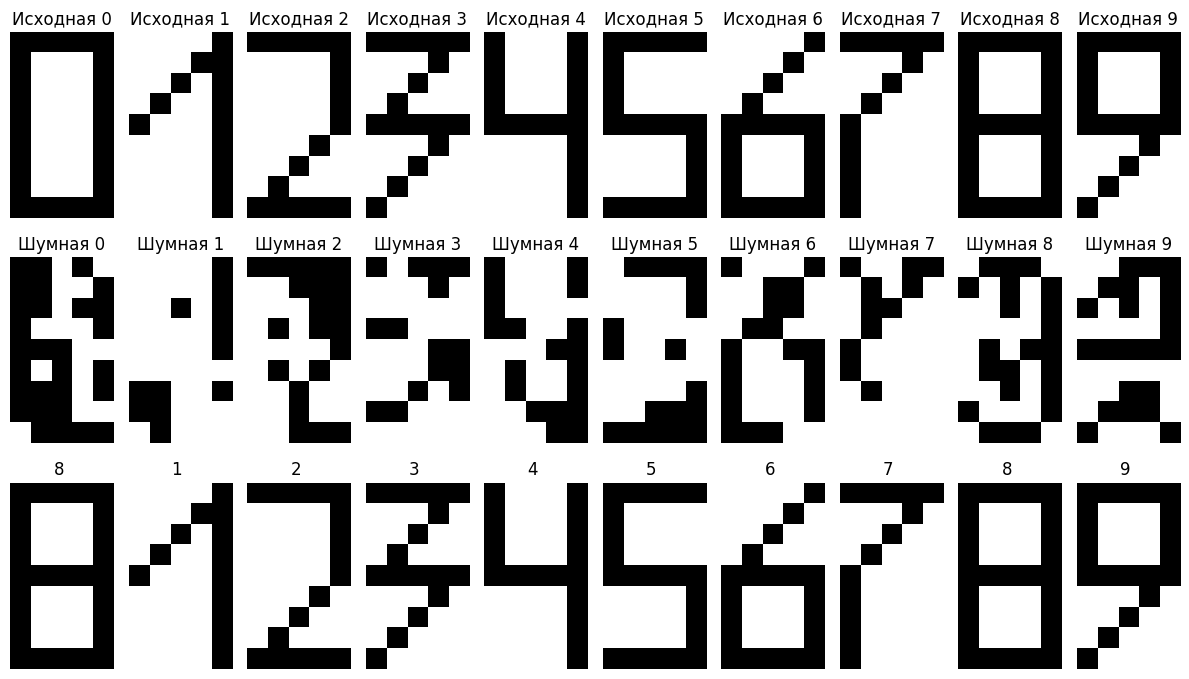

In [ ]:
# Визуализация
plt.figure(figsize=(12, 7))
for i in range(10):
    plt.subplot(3, 10, i+1)
    plt.imshow(numbers[i], cmap='gray_r', extent=[0, vec.shape[1], 0, vec.shape[0]])
    plt.title(f"Исходная {i}")
    plt.axis('off')

for i in range(10):
    plt.subplot(3, 10, 11+i)
    plt.imshow(noisy_numbers[i], cmap='gray_r', extent=[0, vec.shape[1], 0, vec.shape[0]])
    plt.title(f"Шумная {i}")
    plt.axis('off')

for i in range(10):
    y1 = F(np.dot(w, noisy[i]))
    y2 = F(np.dot(E, y1))

    while np.linalg.norm(y2 - y1)**2 > dif:
        y1 = y2
        y2 = F(np.dot(E, y1))

    recognized = y2.argmax()
    plt.subplot(3, 10, 21+i)
    plt.imshow(numbers[recognized], cmap='gray_r', extent=[0, vec.shape[1], 0, vec.shape[0]])
    plt.title(f"{recognized} ")
    plt.axis('off')

plt.tight_layout()
plt.show()